In [9]:
%pip install requests

     -------------------------------------- 62.6/62.6 kB 480.1 kB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 61.5/61.5 kB 470.6 kB/s eta 0:00:00
     -------------------------------------- 123.6/123.6 kB 1.5 MB/s eta 0:00:00
     ------------------------------------ 157.0/157.0 kB 447.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *

from protocol_getter import ProtocolGetter

In [4]:
knesset_members_df = pd.read_csv('kns_csv_files\kns_person.csv')
first_names, last_names = knesset_members_df['FirstName'].to_list(), knesset_members_df['LastName'].to_list()
knesset_members = [' '.join([first_name, last_name]) for first_name, last_name in zip(first_names, last_names)]

In [5]:
import pandas as pd

cms = pd.read_csv("kns_csv_files\kns_committeesession.csv")

filtered = cms
filtered = filtered[filtered.CommitteeID == 929]
filtered = filtered[["CommitteeSessionID", "text_parsed_filename"]].dropna()["CommitteeSessionID"].tolist()
filtered

[571273,
 571851,
 572675,
 575804,
 576198,
 576237,
 576300,
 577328,
 577644,
 577650,
 577831,
 578064,
 578212,
 578586,
 578587,
 578695,
 578753,
 2005883,
 2005886,
 2006308,
 2006840,
 2007685,
 2008621,
 2009585,
 2010077,
 2010807,
 2010822,
 2012271,
 2013583,
 2013669,
 2015053,
 2015864,
 2015869,
 2016504,
 2016522,
 2016615,
 2016616,
 2016827,
 2017010,
 2017389,
 2017439,
 2017884,
 2018484,
 2018516,
 2018785,
 2018904,
 2018996,
 2019321,
 2019474,
 2019491,
 2019802,
 2020086,
 2020707,
 2021174,
 2022373,
 2022423,
 2022435,
 2022556,
 2022636,
 2022857,
 2022862,
 2023264,
 2023480,
 2023677,
 2024054,
 2024545,
 2024866,
 2025036,
 2025570,
 2025592,
 2063363,
 2063424,
 2064207,
 2064556,
 2064560,
 2064983,
 2065255,
 2065644,
 2065844,
 2065940,
 2065949,
 2066035,
 2066227,
 2066239,
 2067948,
 2068029,
 2068148,
 2068226,
 2068266,
 2068861,
 2069218,
 2069771,
 2069813,
 2070373,
 2070421,
 2070689,
 2070910,
 2071418,
 2071464,
 2071811,
 2071816,
 207215

In [32]:
path = "results/"
knss = [20, 21, 22, 23, 24, 25]
categorys = [1, 2, 4, 6, 13]
agg_scores = []
warned = []
warning_score = []
kns_cat = []
knastot = {}
catagor = {}
number_of_sessions = 0
cms = pd.read_csv("kns_csv_files\kns_committeesession.csv")

for kns in knss:
    for cat in categorys:
        protocol_getter = ProtocolGetter(COMMITTEES_PATH, kns, kns, [cat])
        committee = protocol_getter.committee_ids[0]
        filtered = cms
        filtered = filtered[filtered.CommitteeID == committee]
        sesseions = filtered[["CommitteeSessionID", "text_parsed_filename"]].dropna()["CommitteeSessionID"].tolist()
        agg_scores_per_sess = []
        for session in sesseions:
            try:
                with open(f'{path}finetune_{session}.pkl', 'rb') as f:
                    tmp_dct = pickle.load(f)
                number_of_sessions += 1
            except FileNotFoundError:
                continue
            speaker_cnt = tmp_dct['speaker_cnt']
            n_speakers = tmp_dct['n_speakers']
            n_speaks = tmp_dct['n_speaks']
            warnings = tmp_dct['warnings']
            for member, w1w2w3 in warnings.items():
                if sum(w1w2w3) != 0 and member in knesset_members:
                    W = w1w2w3[0] + w1w2w3[1]*2 + w1w2w3[2]*3
                    mk = n_speaks*speaker_cnt[member]
                    logn = np.log2(n_speakers)
                    warning_score = (W*logn)/mk
                    warned.append((member, w1w2w3, kns, CATEGORY_ID_TO_NAME[cat], session, warning_score))
            agg_score = tmp_dct['agg_score']
            agg_scores_per_sess.append(agg_score)
        avg_agg_score = np.mean(agg_scores_per_sess)
        agg_scores.append(avg_agg_score)
        kns_cat.append(f'{kns}_{CATEGORY_ID_TO_NAME[cat]}')
        tmp_val = knastot.get(kns, [])
        tmp_val.append(avg_agg_score)
        knastot[kns] = tmp_val
        catagor[CATEGORY_ID_TO_NAME[cat]] = tmp_val

avg_knasot = {}
for kns, agg_lst in knastot.items():
    avg_knasot[str(kns)] = np.average(agg_lst)
avg_cat = {}
for cat, agg_lst in catagor.items():
    avg_cat[cat] = np.average(agg_lst)

c:\Users\ely5k\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ely5k\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\ely5k\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ely5k\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\ely5k\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ely5k\AppData\Loca

In [33]:
number_of_sessions

1653

In [34]:
warned

[('שולי מועלם-רפאלי', [2, 0, 0], 20, 'knesset', 2075644, 0.01537929673558964),
 ('דוד ביטן', [2, 0, 0], 20, 'knesset', 2075644, 0.00768964836779482),
 ('עודד פורר', [2, 0, 0], 20, 'knesset', 2075644, 0.01318225434479112),
 ('רוברט אילטוב', [0, 2, 0], 20, 'knesset', 2077581, 0.11423153158350674),
 ('פנינה תמנו', [2, 0, 0], 20, 'knesset', 2077650, 0.0064786027586996395),
 ('אחמד טיבי', [0, 2, 0], 20, 'knesset', 2078104, 0.0018677237782965927),
 ('יואל חסון', [2, 0, 0], 20, 'knesset', 2078104, 0.0003939729844844375),
 ('איילת נחמיאס ורבין',
  [2, 0, 0],
  20,
  'knesset',
  2078104,
  0.0007204077430572572),
 ('אחמד טיבי', [2, 0, 0], 20, 'knesset', 2078121, 0.0028637311162822087),
 ('יואל חסון', [2, 2, 0], 20, 'knesset', 2078121, 0.015620351543357502),
 ('אוסנת הילה מארק', [1, 0, 0], 20, 'knesset', 2078121, 0.0013016959619464585),
 ('פנינה תמנו', [4, 4, 2], 20, 'knesset', 2078158, 0.004486381545196385),
 ('אורן אסף חזן', [1, 0, 2], 20, 'knesset', 2078158, 0.0014762879443594942),
 ('יחיאל 

In [35]:
ind = 0
knasots = {}
for k_c in kns_cat:
    a = k_c[:2]
    tmp = knasots.get(a, [[], []])
    tmp[0].append(k_c)
    tmp[1].append(agg_scores[ind])
    knasots[a] = tmp
    ind += 1


In [36]:
knasots

{'20': [['20_knesset',
   '20_finance',
   '20_defense',
   '20_law and order',
   '20_science'],
  [0.15912342216961808,
   0.21102019580583847,
   0.25995444256257894,
   0.2654081363399679,
   0.3022683143867017]],
 '21': [['21_knesset',
   '21_finance',
   '21_defense',
   '21_law and order',
   '21_science'],
  [nan, 0.2619748969132838, 0.2496423007320386, nan, nan]],
 '22': [['22_knesset',
   '22_finance',
   '22_defense',
   '22_law and order',
   '22_science'],
  [0.20259923954450995, 0.24414653062078273, 0.16863808767633837, nan, nan]],
 '23': [['23_knesset',
   '23_finance',
   '23_defense',
   '23_law and order',
   '23_science'],
  [0.18612625061130586,
   0.23968979993713016,
   0.23670878762208913,
   0.22265923555262074,
   0.27237521340426335]],
 '24': [['24_knesset',
   '24_finance',
   '24_defense',
   '24_law and order',
   '24_science'],
  [0.18675600363799635,
   0.2515289776306446,
   0.26015820905594667,
   0.21543025707159874,
   nan]],
 '25': [['25_knesset',
  

In [37]:
avg_knasot

for i, arr in knasots.items():
    fixed = []
    for scr in arr[1]:
        if scr >= 0:
            fixed.append(scr)
    avg_knasot[i] = np.average(fixed)
    


In [38]:
cats_names = list(avg_cat.keys())
for ind, cat in enumerate(cats_names):
    fixed = []
    for i, arr in knasots.items():
        if arr[1][ind] >= 0:
            fixed.append(arr[1][ind])
    avg_cat[cat] = np.average(fixed)


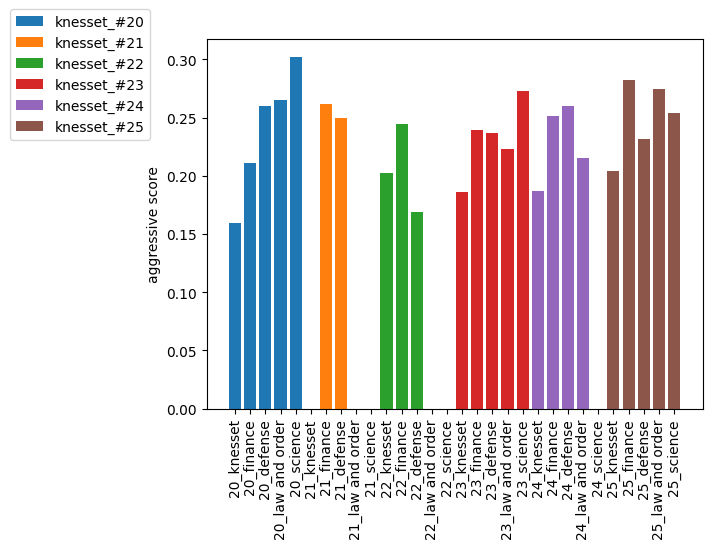

In [39]:
for kns, duo in knasots.items():
    plt.bar(duo[0], duo[1], label= f'knesset_#{kns}')
plt.ylabel("aggressive score")
plt.legend(bbox_to_anchor=(-0.1, 1.1))
plt.xticks(rotation = 90)
plt.show()

Text(0, 0.5, 'aggressive score')

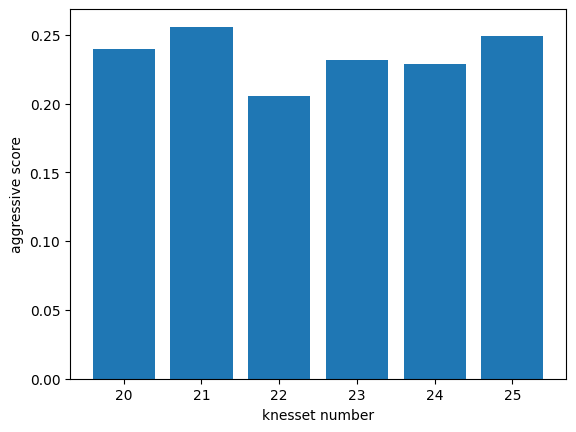

In [40]:
plt.bar(avg_knasot.keys(), avg_knasot.values())
plt.xlabel("knesset number")
plt.ylabel("aggressive score")

Text(0, 0.5, 'aggressive score')

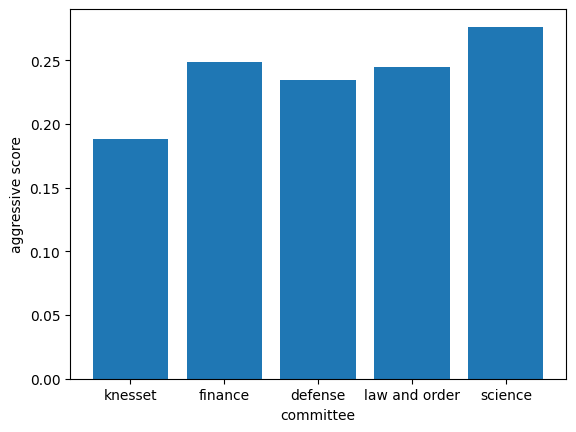

In [41]:
plt.bar(avg_cat.keys(), avg_cat.values())
plt.xlabel("committee")
plt.ylabel("aggressive score")

In [42]:
warned

[('שולי מועלם-רפאלי', [2, 0, 0], 20, 'knesset', 2075644, 0.01537929673558964),
 ('דוד ביטן', [2, 0, 0], 20, 'knesset', 2075644, 0.00768964836779482),
 ('עודד פורר', [2, 0, 0], 20, 'knesset', 2075644, 0.01318225434479112),
 ('רוברט אילטוב', [0, 2, 0], 20, 'knesset', 2077581, 0.11423153158350674),
 ('פנינה תמנו', [2, 0, 0], 20, 'knesset', 2077650, 0.0064786027586996395),
 ('אחמד טיבי', [0, 2, 0], 20, 'knesset', 2078104, 0.0018677237782965927),
 ('יואל חסון', [2, 0, 0], 20, 'knesset', 2078104, 0.0003939729844844375),
 ('איילת נחמיאס ורבין',
  [2, 0, 0],
  20,
  'knesset',
  2078104,
  0.0007204077430572572),
 ('אחמד טיבי', [2, 0, 0], 20, 'knesset', 2078121, 0.0028637311162822087),
 ('יואל חסון', [2, 2, 0], 20, 'knesset', 2078121, 0.015620351543357502),
 ('אוסנת הילה מארק', [1, 0, 0], 20, 'knesset', 2078121, 0.0013016959619464585),
 ('פנינה תמנו', [4, 4, 2], 20, 'knesset', 2078158, 0.004486381545196385),
 ('אורן אסף חזן', [1, 0, 2], 20, 'knesset', 2078158, 0.0014762879443594942),
 ('יחיאל 

In [43]:
warnings_by_member = {}
warnings_by_knesset = {}
warnings_by_category = {}
warning_score_by_member = {}
warning_score_by_knesset = {}
warning_score_by_category = {}
for member, w1w2w3, kns, cat, protocol, warning_score in warned:
    cur_by_member = warnings_by_member.get(member, [0, 0, 0])
    cur_by_kns = warnings_by_knesset.get(kns, [0, 0, 0])
    cur_by_cat = warnings_by_category.get(cat, [0, 0, 0])

    scr_by_member = warning_score_by_member.get(member, [])
    scr_by_kns = warning_score_by_knesset.get(kns, [])
    scr_by_cat = warning_score_by_category.get(cat, [])
    scr_by_member.append(warning_score)
    scr_by_kns.append(warning_score)
    scr_by_cat.append(warning_score)
    warning_score_by_member[member] = scr_by_member
    warning_score_by_knesset[kns] = scr_by_kns
    warning_score_by_category[cat] = scr_by_cat

    for i in range(3):
        cur_by_member[i] += w1w2w3[i]
        cur_by_kns[i] += w1w2w3[i]
        cur_by_cat[i] += w1w2w3[i]
    warnings_by_member[member] = cur_by_member
    warnings_by_knesset[kns] = cur_by_kns
    warnings_by_category[cat] = cur_by_cat


In [44]:
warning_score_by_category

{'knesset': [0.01537929673558964,
  0.00768964836779482,
  0.01318225434479112,
  0.11423153158350674,
  0.0064786027586996395,
  0.0018677237782965927,
  0.0003939729844844375,
  0.0007204077430572572,
  0.0028637311162822087,
  0.015620351543357502,
  0.0013016959619464585,
  0.004486381545196385,
  0.0014762879443594942,
  0.014285714285714285,
  0.15,
  0.15094880959249105,
  0.0005351889235447529,
  0.001337972308861882,
  0.000668986154430941,
  0.005351889235447528,
  0.00023460977986895044,
  0.00012938039331008297,
  0.0001419010765336394,
  0.0006639899430253315,
  0.006003645836064985,
  0.0015316725020849257,
  0.004246910119417294,
  0.004917474875114762,
  0.0025290659268270743,
  0.02648448039676985,
  0.011494252873563218,
  0.000361347631854284,
  0.056480516222649754,
  0.0706006452783122,
  0.0027722545737901235,
  0.0006930636434475309,
  0.000594054551526455,
  0.6792696431662097,
  0.001224892593265163,
  0.08845440361475665,
  0.010416666666666666,
  0.0003680148